In [1]:
include("../utils.jl")
include("yobst.jl")

yobst_model (generic function with 1 method)

In [2]:
yom = yobst_model(;
    params = (
        D0_ = 0, 
        e_ = 0.2, 
        p_ = 0.04, 
        N_ = 120, 
        AnzahlContainer_ = 1,
        InvestProContainer_ = 90000,
        WeitererInvest_ = 50000,
        Kisteninvest_ = 10000,
        ContainerPacht_ = 200,
        Umsatzbeteiligung_ = 0.08,
        UmsatzProContainer_ = nothing,
        Mietkosten_ = 3000,
        Personalkosten_ = 400000 / 12,
        WeitereKosten_ = 1000,
    )
)

Dict{String, Any} with 11 entries:
  "Z"               => [400.0, 396.667, 393.333, 390.0, 386.667, 383.333, 380.0…
  "EBITDA"          => Num[0.08UmsatzProContainer - 37533.3, 0.08UmsatzProConta…
  "Erfolg"          => Num[0.08UmsatzProContainer - 37533.3, 0.08UmsatzProConta…
  "BR"              => Num[0.08UmsatzProContainer - 38933.3, 0.16UmsatzProConta…
  "T"               => 1000.0
  "AMOR"            => Num[0.08UmsatzProContainer - 1.87533e5, 0.16UmsatzProCon…
  "EBT"             => Num[0.08UmsatzProContainer - 38933.3, 0.08UmsatzProConta…
  "Kosten"          => [1.87533e5, 37533.3, 37533.3, 37533.3, 37533.3, 37533.3,…
  "EBIT"            => Num[0.08UmsatzProContainer - 38533.3, 0.08UmsatzProConta…
  "Deckungsbeitrag" => Num[150000 + 0.08UmsatzProContainer, 0.08UmsatzProContai…
  "Erlöse"          => Num[150000 + 0.08UmsatzProContainer, 0.08UmsatzProContai…

In [3]:
#yom["BR"]

#### UmsatzProContainer in Abhängigkeit von AnzahlContainer unter der Bedingung EBT = 0 (im ersten Monat):

In [4]:
include("yobst.jl")
yom = yobst_model(;
    params = (
        D0_ = nothing, 
        e_ = 0.0, 
        p_ = 0.04, 
        N_ = 120, 
        AnzahlContainer_ = nothing,
        InvestProContainer_ = 95000,
        WeitererInvest_ = 0,
        Kisteninvest_ = 0,
        ContainerPacht_ = 200,
        Umsatzbeteiligung_ = 0.15,
        UmsatzProContainer_ = nothing,
        Mietkosten_ = 5000,
        Personalkosten_ = 50000,
        WeitereKosten_ = 0,
    )
)


Dict{String, Any} with 11 entries:
  "Z"               => Num[316.667AnzahlContainer, 314.028AnzahlContainer, 311.…
  "EBITDA"          => Num[0.15AnzahlContainer*UmsatzProContainer - 55200, 0.15…
  "Erfolg"          => Num[0.15AnzahlContainer*UmsatzProContainer - 55200, 0.15…
  "BR"              => Num[0.15AnzahlContainer*UmsatzProContainer - 55200 - 110…
  "T"               => (2375//3)*AnzahlContainer
  "AMOR"            => Num[0.15AnzahlContainer*UmsatzProContainer - 55200 - 950…
  "EBT"             => Num[0.15AnzahlContainer*UmsatzProContainer - 55200 - 110…
  "Kosten"          => Num[55200 + 95000AnzahlContainer, 55200, 55200, 55200, 5…
  "EBIT"            => Num[0.15AnzahlContainer*UmsatzProContainer - 55200 - (23…
  "Deckungsbeitrag" => Num[95000AnzahlContainer + 0.15AnzahlContainer*UmsatzPro…
  "Erlöse"          => Num[95000AnzahlContainer + 0.15AnzahlContainer*UmsatzPro…

In [13]:
yom["EBT"][1]

0.15AnzahlContainer*UmsatzProContainer - 55200 - 1108.3333333333333AnzahlContainer

In [21]:
NST(yom["EBT"][1]; varindex = 2)

(-55200 - 1108.3333333333333AnzahlContainer) / (-0.15AnzahlContainer)

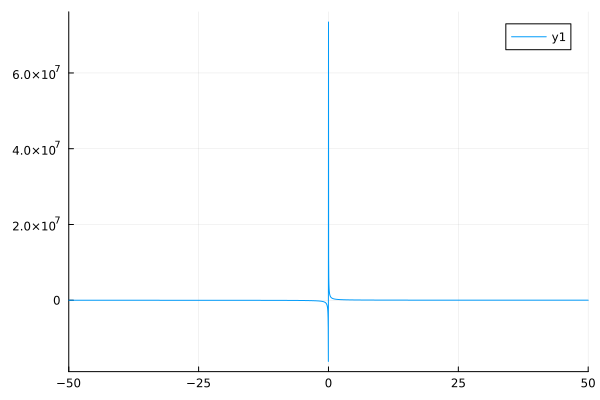

In [45]:
using Plots
U(n) = (-55200 - 1108*n) / (-0.15 * n)
plot(U, xlims = (-50,50))

In [37]:
U(10000000000000)

7386.666666703467

In [38]:
U(10000000000000)*12 / 25

3545.600000017664

In [22]:
NST(yom["EBT"][1]; varindex = 1)

-55200.0 / (1108.3333333333333 - 0.15UmsatzProContainer)

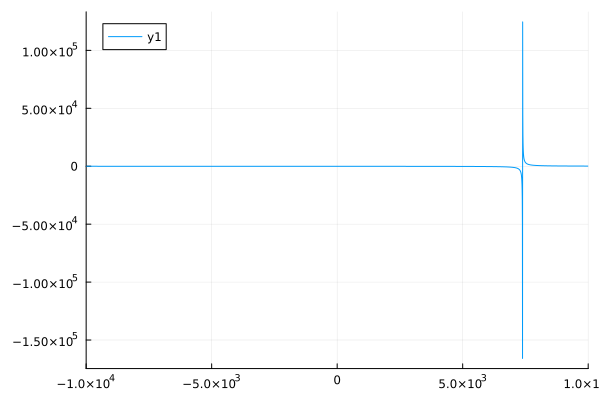

In [50]:
A(n) = -55200 / (1108 - 0.15 * n) #Anzahl Container
plot(A, xlims = (-10000,10000))

In [44]:
AA(7350)

-10036.363636363636